In [97]:
# Python at Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [115]:
#read csv file
data = pd.read_csv('C:/Users/User/Downloads/xfab technical test/Tool_Sensor_Data.csv')
data.head()
print(data.shape)

(14844, 90)


In [116]:
# 1.1 Data Preprocessing
# 1.1.1 Data Cleaning
# check missing values
print(data.isna().sum())

TimeStamp           0
ToolName            0
TOOL_ID             0
Run                 0
RunStartTime        0
                ...  
Unnamed: 85     14844
Unnamed: 86     14844
Unnamed: 87     14844
Unnamed: 88     14844
Unnamed: 89     14844
Length: 90, dtype: int64


In [117]:
# drop the columns with missing values
data = data.dropna(axis=1, how='all')

# test again the total missing values
print(data.isna().sum())
print(data.shape)

TimeStamp           0
ToolName            0
TOOL_ID             0
Run                 0
RunStartTime        0
                ...  
EventType       14388
EventName       14388
EventId         14388
CalcStepSeq       228
CalcLoopSeq       228
Length: 73, dtype: int64
(14844, 73)


In [118]:
# find columns that contain more than 80% of zero
zero_columns = data.columns[(data == 0).mean() > 0.8]
print(zero_columns)

Index(['HasComments', 'EHVtYhnRGb', 'XSOeMfJAB', 'SYklrMAXe', 'jQVGDTFl',
       'YDlkDLfFEEi', 'CYiycrAoYbg', 'oUWQRhjudAd'],
      dtype='object')


In [119]:
# Drop columns containing all zeros
data.drop(zero_columns, axis=1, inplace=True)
data.head()
print(data.shape)

(14844, 65)


In [120]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
print(data.shape)

(14113, 65)


In [121]:
# remove specific columns
data.drop(columns=['EventType', 'EventName', 'EventId','RunStartTime'], inplace=True)
print(data.shape)

(14113, 61)


In [122]:
# Drop rows with NaN values
data.dropna(inplace=True)
print(data.shape)

(13657, 61)


In [123]:
# check missing values again
print('Total missing values:', data.isna().sum().sum())

Total missing values: 0


In [124]:
# check whether there are any blank space in the dataset
blank_spaces = data.isnull().values.any()

if blank_spaces:
    print("Blank spaces exist.")
else:
    print("No blank spaces found.")

No blank spaces found.


In [125]:
# Select rows where values in the specified columns are non-negative
tool_sensor_data_cleaned = data.loc[(data[['YiAwOaAhwskZcEfg','tMqophNywoUtXsGZAeVHBvtFjuyM']] >= 0).all(axis=1)]
print(tool_sensor_data_cleaned.shape)

(2085, 61)


In [126]:
tool_sensor_data_cleaned.head()

,TimeStamp,ToolName,TOOL_ID,Run,DATA_QUALITY,EQPType,LOT_ID,LogicalRecipeID,LotPurposeType,LotType,...,nJdvUmCcjI,NACdQXDDBP,NyUITkJtCGK,QesumGN,ETcatZBXS,RnVvcKsHhDEyb,tMqophNywoUtXsGZAeVHBvtFjuyM,WTcLPnkDtRwBuCou,CalcStepSeq,CalcLoopSeq
52,21/3/2023 19:17,A,A,62301,63.49,A,A,A,Process Lot,Production,...,1001.0,2001.0,0.74,21.0,1800.0,81.0,1890.0,75.0,9.0,9.0
53,21/3/2023 19:17,A,A,62301,63.49,A,A,A,Process Lot,Production,...,1001.0,2000.0,0.74,21.0,4000.0,81.0,1890.0,75.0,9.0,9.0
54,21/3/2023 19:17,A,A,62301,63.49,A,A,A,Process Lot,Production,...,1001.0,2001.0,0.74,22.0,600.0,81.0,1890.0,75.0,10.0,10.0
55,21/3/2023 19:17,A,A,62301,63.49,A,A,A,Process Lot,Production,...,1001.0,2001.0,0.74,22.0,2700.0,81.0,1890.0,75.0,10.0,10.0
56,21/3/2023 19:17,A,A,62301,63.49,A,A,A,Process Lot,Production,...,1001.0,2003.0,0.74,23.0,1600.0,81.0,1890.0,75.0,11.0,11.0


In [127]:
# Convert to datetime format
tool_sensor_data_cleaned['TimeStamp'] = pd.to_datetime(tool_sensor_data_cleaned['TimeStamp'], format='%d/%m/%Y %H:%M')

# Extract date
tool_sensor_data_cleaned['new_timestamp'] = tool_sensor_data_cleaned['TimeStamp'].dt.date

# Convert to datetime format
tool_sensor_data_cleaned['new_timestamp'] = pd.to_datetime(tool_sensor_data_cleaned['new_timestamp'])

# Drop the original 'timestamp' column
tool_sensor_data_cleaned.drop(columns=['TimeStamp'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13308\670117732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_sensor_data_cleaned['TimeStamp'] = pd.to_datetime(tool_sensor_data_cleaned['TimeStamp'], format='%d/%m/%Y %H:%M')
C:\Users\User\AppData\Local\Temp\ipykernel_13308\670117732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tool_sensor_data_cleaned['new_timestamp'] = tool_sensor_data_cleaned['TimeStamp'].dt.date
C:\Users\User\AppData\Local\Temp\ipykernel_13308\670117732.py:8: SettingWithCopyW

In [128]:
tool_sensor_data_cleaned.head()

,ToolName,TOOL_ID,Run,DATA_QUALITY,EQPType,LOT_ID,LogicalRecipeID,LotPurposeType,LotType,MachineRecipeID,...,NACdQXDDBP,NyUITkJtCGK,QesumGN,ETcatZBXS,RnVvcKsHhDEyb,tMqophNywoUtXsGZAeVHBvtFjuyM,WTcLPnkDtRwBuCou,CalcStepSeq,CalcLoopSeq,new_timestamp
52,A,A,62301,63.49,A,A,A,Process Lot,Production,A,...,2001.0,0.74,21.0,1800.0,81.0,1890.0,75.0,9.0,9.0,2023-03-21
53,A,A,62301,63.49,A,A,A,Process Lot,Production,A,...,2000.0,0.74,21.0,4000.0,81.0,1890.0,75.0,9.0,9.0,2023-03-21
54,A,A,62301,63.49,A,A,A,Process Lot,Production,A,...,2001.0,0.74,22.0,600.0,81.0,1890.0,75.0,10.0,10.0,2023-03-21
55,A,A,62301,63.49,A,A,A,Process Lot,Production,A,...,2001.0,0.74,22.0,2700.0,81.0,1890.0,75.0,10.0,10.0,2023-03-21
56,A,A,62301,63.49,A,A,A,Process Lot,Production,A,...,2003.0,0.74,23.0,1600.0,81.0,1890.0,75.0,11.0,11.0,2023-03-21


In [129]:
tool_sensor_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 52 to 14842
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ToolName                      2085 non-null   object        
 1   TOOL_ID                       2085 non-null   object        
 2   Run                           2085 non-null   int64         
 3   DATA_QUALITY                  2085 non-null   float64       
 4   EQPType                       2085 non-null   object        
 5   LOT_ID                        2085 non-null   object        
 6   LogicalRecipeID               2085 non-null   object        
 7   LotPurposeType                2085 non-null   object        
 8   LotType                       2085 non-null   object        
 9   MachineRecipeID               2085 non-null   object        
 10  PhysicalRecipeID              2085 non-null   object        
 11  PortID                        208

In [256]:
# save the cleaned data in csv file for future use
tool_sensor_data_cleaned.to_csv('tool_sensor_data_cleaned.csv', index=False)

In [136]:
# 1.2 EDA
#Separate the numerical and categorical variables
# Identify numeric data
numeric_data = tool_sensor_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Identify category data
category_data = tool_sensor_data_cleaned.select_dtypes(include=['object'])

In [131]:
# 1.2.1 Standardization
# Scale only the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled_data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

In [132]:
# 1.2.2 Summary Statistics
selected_sensors = ['OunhHslCRwIRilo','BmpcKiosIw','SwpYipezsdueC','ArsbiQzICA','ETcatZBXS']

# create summary stats with selected sensor column
sum_stats = scaled_df[selected_sensors].describe()
sum_stats.loc['range'] = sum_stats.loc['max'] - sum_stats.loc['min']
sum_stats.loc['IQR'] = sum_stats.loc['75%'] - sum_stats.loc['25%']
sum_stats

,OunhHslCRwIRilo,BmpcKiosIw,SwpYipezsdueC,ArsbiQzICA,ETcatZBXS
count,2.085000e+03,2.085000e+03,2.085000e+03,2.085000e+03,2.085000e+03
mean,-2.726303e-17,6.815758e-17,2.341213e-15,3.407879e-17,1.703939e-17
std,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00,1.000240e+00
min,-1.794978e+00,-8.147605e-01,-4.118417e+00,-1.703666e+00,-1.414462e+00
25%,-7.756440e-01,-1.324496e-01,1.553122e-02,-1.494832e+00,-8.649873e-01
50%,4.582864e-01,-1.908104e-02,2.451950e-01,6.143930e-01,-7.130142e-02
75%,8.338304e-01,-8.583952e-03,4.748588e-01,6.143930e-01,8.444900e-01
max,9.232456e-01,1.432624e+01,9.341865e-01,6.143930e-01,2.187651e+00
range,2.718223e+00,1.514100e+01,5.052604e+00,2.318059e+00,3.602113e+00
IQR,1.609474e+00,1.238657e-01,4.593276e-01,2.109225e+00,1.709477e+00


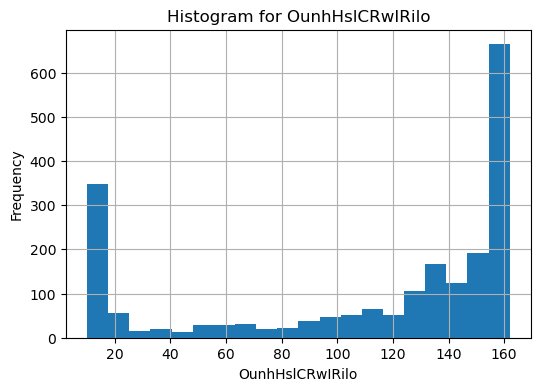

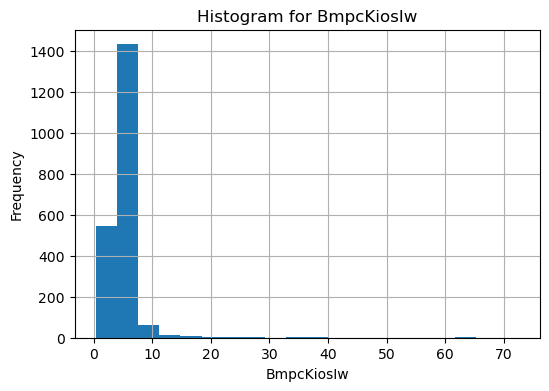

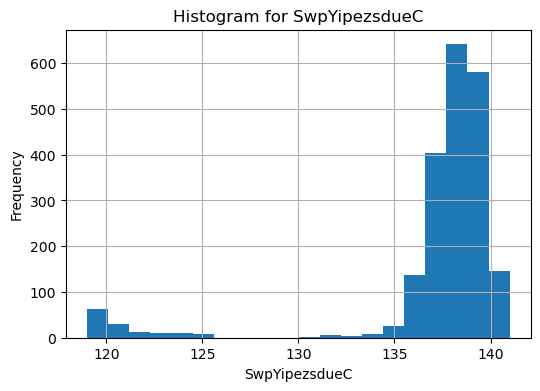

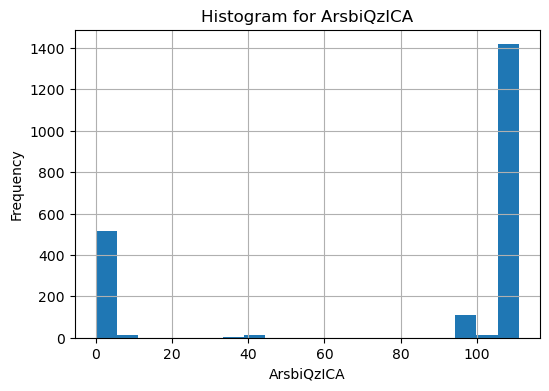

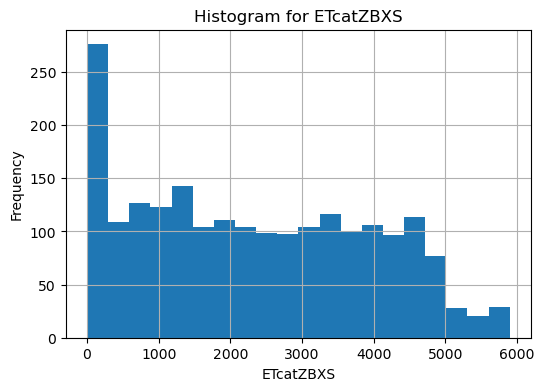

In [133]:
# 1.2.3 Histograms
# Generate a histogram for each selected column
for column in selected_sensors:
    plt.figure(figsize=(6, 4))
    numeric_data[column].hist(bins=20)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show() 

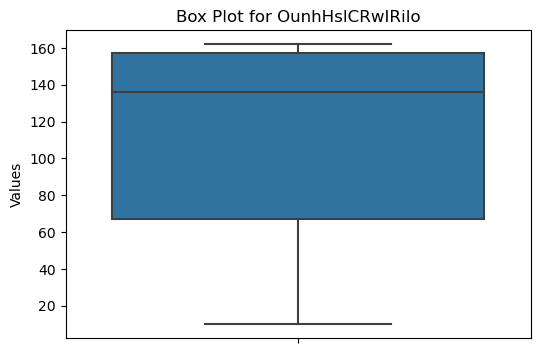

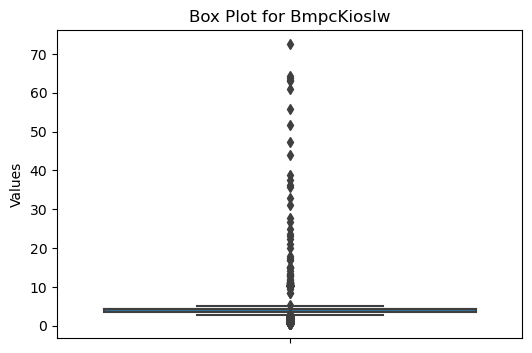

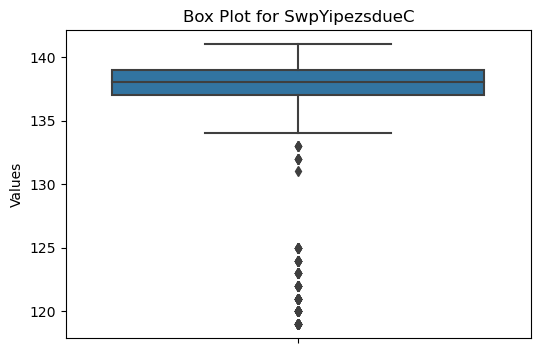

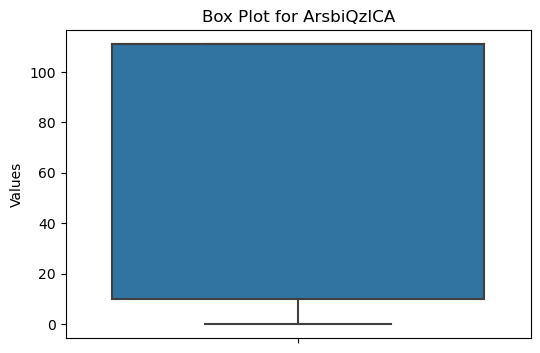

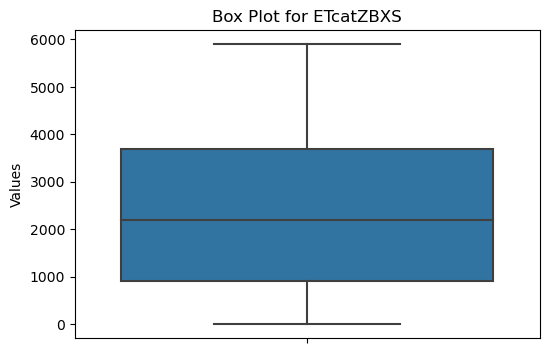

In [242]:
# 1.2.4 Boxplot - to detect outliers
# Generate a box plot for each selected column
import seaborn as sns

for column in selected_sensors:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=numeric_data, y=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

In [55]:
# 1.2.5 Correlation
# correlation between different sensors
correlation_matrix = numeric_data[selected_sensors].corr()
correlation_matrix

,OunhHslCRwIRilo,BmpcKiosIw,SwpYipezsdueC,ArsbiQzICA,ETcatZBXS
OunhHslCRwIRilo,1.000000,-0.006265,-0.160739,-0.268538,-0.016525
BmpcKiosIw,-0.006265,1.000000,-0.466063,0.246752,-0.145838
SwpYipezsdueC,-0.160739,-0.466063,1.000000,0.175507,0.242649
ArsbiQzICA,-0.268538,0.246752,0.175507,1.000000,0.133167
ETcatZBXS,-0.016525,-0.145838,0.242649,0.133167,1.000000


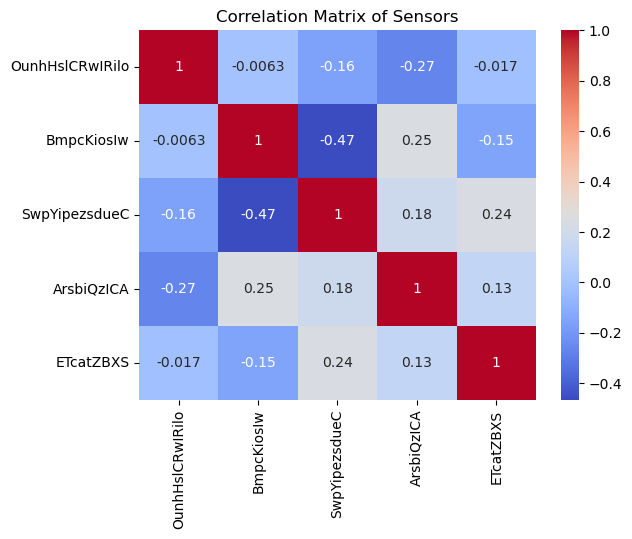

In [234]:
# 1.2.6 Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sensors')
plt.show()

In [145]:
#calculate the average sensor readings and group by day for line graph
sensor_daily_avg = tool_sensor_data_cleaned.groupby('new_timestamp')[selected_sensors].mean().reset_index()
sensor_daily_avg

,new_timestamp,OunhHslCRwIRilo,BmpcKiosIw,SwpYipezsdueC,ArsbiQzICA,ETcatZBXS
0,2023-03-21,120.053030,4.025303,136.954545,77.337121,2118.181818
1,2023-03-22,111.327689,4.330408,136.606574,83.883466,2363.944223
2,2023-03-23,105.819188,4.328536,137.322263,79.968020,2323.370234
3,2023-03-24,157.500000,4.247500,138.000000,111.000000,2250.000000


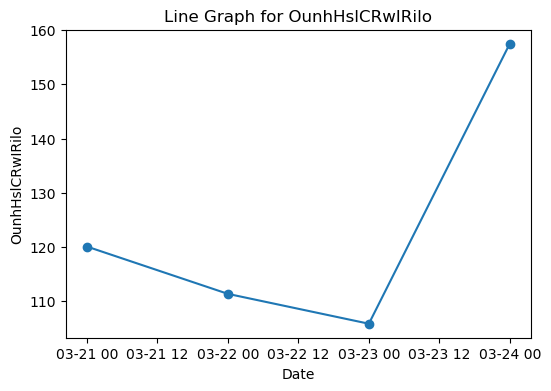

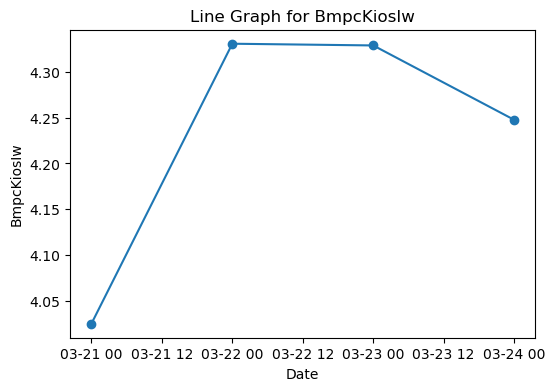

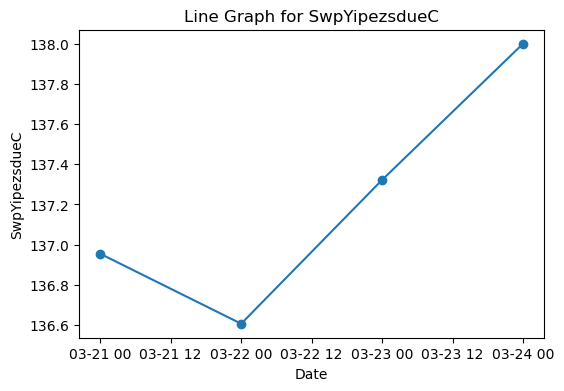

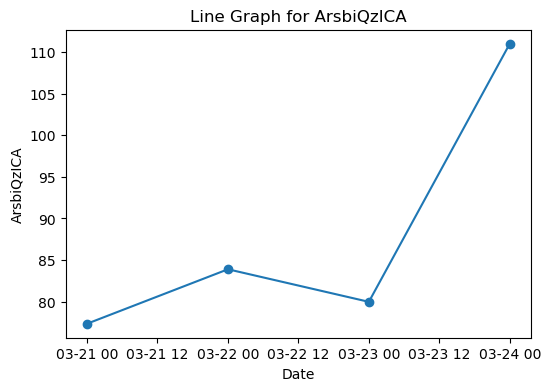

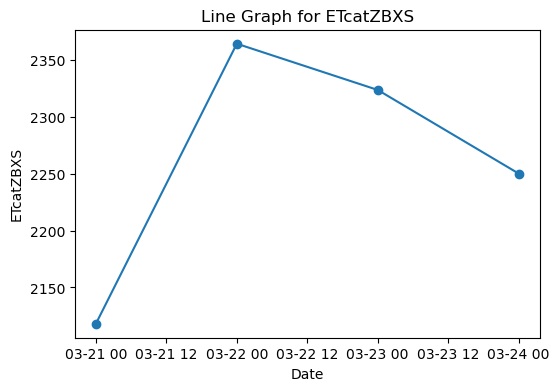

In [146]:
# 1.2.7 Line Graph
for column in selected_sensors:
    plt.figure(figsize=(6, 4))
    plt.plot(sensor_daily_avg['new_timestamp'], sensor_daily_avg[column], marker='o', linestyle='-', label=column)
    plt.title(f'Line Graph for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

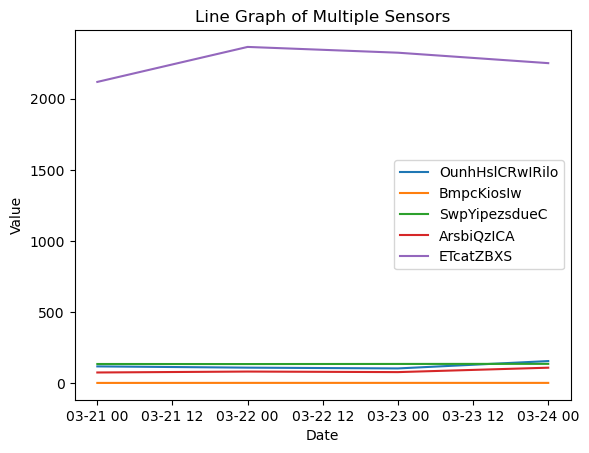

In [150]:
for column in sensor_daily_avg.columns:
    if column != 'new_timestamp':
        plt.plot(sensor_daily_avg['new_timestamp'], sensor_daily_avg[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Graph of Multiple Sensors')
plt.legend()
plt.show()